In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from pathlib import Path
import datetime as dt
import pmdarima as pm
import os 

In [71]:
file = 'trajets_train.csv'
df = pd.read_csv(file,sep=",",index_col=[0]) 
traj1 = df[df['traj']==7809] #3500
print(traj1.shape)
traj2 = df[df['traj']==89117] #2500
#traj1

(102, 32)


In [72]:

model = pm.auto_arima(traj2['RS_E_InAirTemp_PC1'],
                      max_p=12, q_start=0 ,test='kpss', p_start=3,
                      suppress_warnings=True, 
                       stepwise=True, trace=True, information_criterion='aic')
training=traj2['RS_E_InAirTemp_PC1']
model_fit = model.fit(training)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=12263.061, Time=0.80 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12573.133, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12449.944, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=12410.425, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12571.133, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=12269.747, Time=0.52 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=12271.253, Time=0.44 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=12237.592, Time=1.74 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=12254.024, Time=0.97 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=12239.871, Time=1.96 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=12252.350, Time=1.60 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=12250.585, Time=1.45 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=12232.368, Time=2.00 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=12290.507, Time=0.25 sec
 ARIMA(5,1,1)(0,0,0

In [73]:
a = model_fit.params()
AR = a[0:4]
print(AR)

ar.L1    1.181992
ar.L2   -0.382961
ar.L3    0.011130
ar.L4    0.099259
dtype: float64


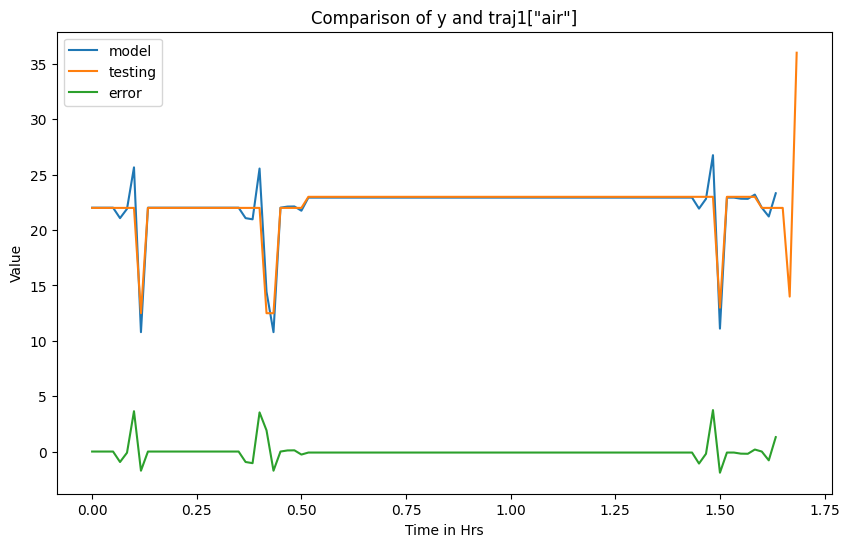

19.46289126221263

In [74]:
testing=traj1['RS_E_InAirTemp_PC1']
y = AR[0]*testing.shift(0)
time_range = np.arange(0, (testing.shape[0]/60), 1/60) #time in hours

for p in range(len(AR)):
    if p>0:
        y = y+AR[p]*testing.shift(-p)

y = y - np.mean(y-testing)



plt.figure(figsize=(10, 6))
plt.plot(time_range,y, label='model')
plt.plot(time_range,testing, label='testing')
plt.plot(time_range,y-testing, label='error')

plt.xlabel('Time in Hrs')
plt.ylabel('Value')
plt.title('Comparison of y and traj1["air"]')
plt.legend()
plt.show()
np.var(y.fillna(0)-testing)

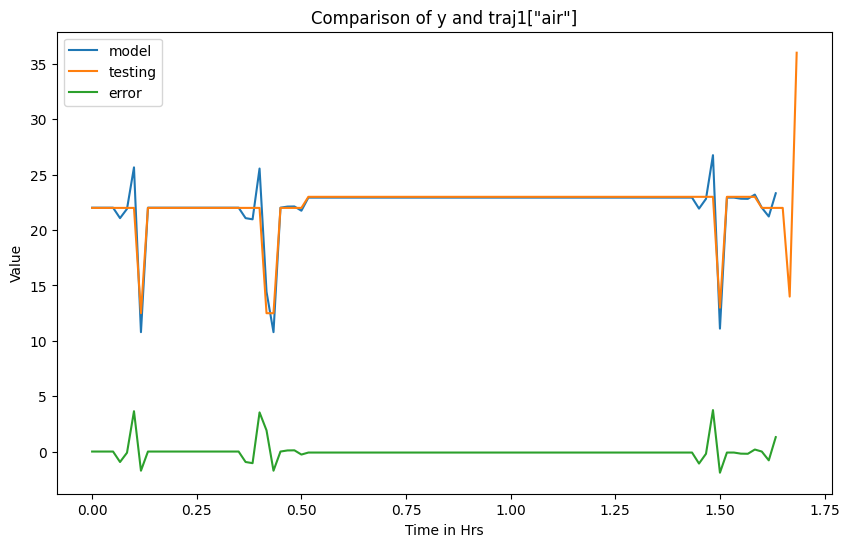

-71.99999999999997

In [75]:
testing=traj1['RS_E_InAirTemp_PC1']
dtest = testing-testing.shift(1).fillna(0)
y = AR[0]*dtest.shift(0)

for p in range(len(AR)):
    if p>0:
        y = y+AR[p]*dtest.shift(-p)

y = y.cumsum()
y = y - np.mean(y-testing)
plt.figure(figsize=(10, 6))
plt.plot(time_range,y, label='model')
plt.plot(time_range,testing, label='testing')
plt.plot(time_range,y-testing, label='error')

plt.xlabel('Time in Hrs')
plt.ylabel('Value')
plt.title('Comparison of y and traj1["air"]')
plt.legend()
plt.show()
sum(y.fillna(0)-testing)